In [1]:
import numpy as np
from scipy.io import arff
import pandas as pd
from sklearn.base import TransformerMixin
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import sys
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
# import data
df = pd.read_csv('titanic.csv')

df.head()
# preprocessing the data
scaler = preprocessing.MinMaxScaler()
features = ['Pclass', 'Sex', 'Age',	'Siblings_Spouses_Aboard', 'Parents_Children_Aboard']

df[features] = scaler.fit_transform(df[features])

train, test = train_test_split(df, train_size = 0.7, shuffle = False)

print(len(train))
print(len(test))

train.head()

620
267


,Pclass,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Survived
0,1.0,1.0,0.250,0.125,0.0,0
1,0.0,0.0,0.375,0.125,0.0,1
2,1.0,0.0,0.250,0.000,0.0,1
3,0.0,0.0,0.375,0.125,0.0,1
4,1.0,1.0,0.375,0.000,0.0,0


In [3]:
# compute the accuracy score
DT = DecisionTreeClassifier()

DT.fit(train[features], train['Survived'])

DT.score(train[features], train['Survived'])

DT.score(test[features], test['Survived'])

0.8314606741573034

In [4]:
# find iterations with maximum area under curve
train_auc = [0, 0]
test_auc = [0, 0]

for i in range(2, 21):
    
    DT = DecisionTreeClassifier(min_samples_leaf=i)
    DT.fit(train[features], train['Survived'])
    
    result = DT.predict(train[features])
    train_auc.append(roc_auc_score(train['Survived'], result))
    
    result = DT.predict(test[features])
    test_auc.append(roc_auc_score(test['Survived'], result))

print(train_auc.index(max(train_auc)))
print(max(train_auc))

print(test_auc.index(max(test_auc)))
print(max(test_auc))

3
0.820931698621799
12
0.8167945906432748


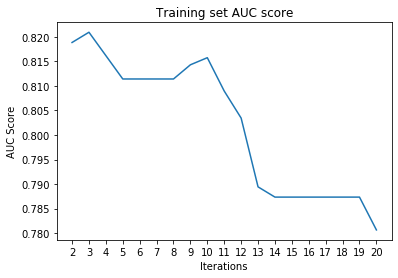

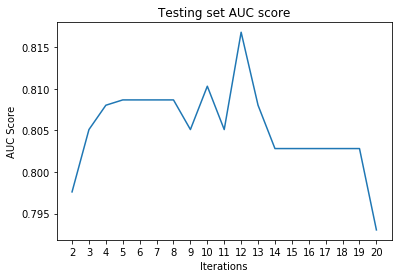

In [5]:
# AUC graphical visualization
plt.plot(range(2,21), train_auc[2:])
plt.xticks(np.arange(2, 21, step=1))
plt.title('Training set AUC score')
plt.ylabel('AUC Score')
plt.xlabel('Iterations')
plt.show()


plt.plot(range(2,21), test_auc[2:])
plt.xticks(np.arange(2, 21, step=1))
plt.title('Testing set AUC score')
plt.ylabel('AUC Score')
plt.xlabel('Iterations')
plt.show()

In [6]:
# define survival rate function
def survival_rate(Pclass, sex):

    count = 0
    survived_count = 0

    for index, row in df.iterrows():
        if (row['Pclass'] == Pclass and row['Sex'] == sex):
            count += 1
        if (row['Pclass'] == Pclass and row['Sex'] == sex and row['Survived'] == 1):
            survived_count += 1

    ans = survived_count/count
    return ans

In [7]:
# computer the survival rate of each group, identified by gender and class
group = ['first class male', 'first class female', 'second flass male', 'second class female', 'thrid class male', 'third class female']
pclass = [0, 0.5, 1]
sex = [0, 1]

temp = 0
for i in pclass:
    for j in sex:
        print('The survival rate of ' + group[temp] + ' is ' + str(survival_rate(i, j)))
        temp += 1

The survival rate of first class male is 0.9680851063829787
The survival rate of first class female is 0.36885245901639346
The survival rate of second flass male is 0.9210526315789473
The survival rate of second class female is 0.1574074074074074
The survival rate of thrid class male is 0.5
The survival rate of third class female is 0.13702623906705538
